<h1><strong><u>Assignment 6 (PCA/Cluster)</u></strong></h1>

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, pair_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

plt.style.use('dark_background')

%run DataCleaningFunctions.ipynb

<h2><strong><u>Data Preprocessing</u></strong></h2>

<h3><u>Data Loading</u></h3>

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/cdavidshaffer/CPSC4970-AI/master/data/penguins.csv")
data.info()
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   species            344 non-null    object
 1   island             344 non-null    object
 2   culmen_length_mm   344 non-null    object
 3   culmen_depth_mm    344 non-null    object
 4   flipper_length_mm  344 non-null    object
 5   body_mass_g        344 non-null    object
 6   sex                344 non-null    object
dtypes: object(7)
memory usage: 18.9+ KB


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,?,?,?,?,?
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,?
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,?


<h3><u>Data Cleaning</u></h3>

In [4]:
# check text column unique values
textual_columns = ['species', 'island', 'sex']
print_unique_values(textual_columns, data)

['Adelie' 'Chinstrap' 'Gentoo']
['Torgersen' 'Biscoe' 'Dream']
['MALE' 'FEMALE' '?' '_']


In [5]:
# Replace invalid text entries
replace_characters = ['?', '_']

for char in replace_characters:
    replace_data_values(data, 'sex', char, None)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   species            344 non-null    object
 1   island             344 non-null    object
 2   culmen_length_mm   344 non-null    object
 3   culmen_depth_mm    344 non-null    object
 4   flipper_length_mm  344 non-null    object
 5   body_mass_g        344 non-null    object
 6   sex                333 non-null    object
dtypes: object(7)
memory usage: 18.9+ KB


/var/folders/0_/nmh5w64x3q5_ffwfkr35sscw0000gn/T/ipykernel_1534/2898130538.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column_name].replace(to_replace, value, inplace=True)


In [6]:
# convert text columns to string type
for i in textual_columns:
    data[i] = data[i].astype('string')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   species            344 non-null    string
 1   island             344 non-null    string
 2   culmen_length_mm   344 non-null    object
 3   culmen_depth_mm    344 non-null    object
 4   flipper_length_mm  344 non-null    object
 5   body_mass_g        344 non-null    object
 6   sex                333 non-null    string
dtypes: object(4), string(3)
memory usage: 18.9+ KB


In [7]:
# clean numerical columns from non-numerical values
numerical_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
check_numerical_column_errors(data, numerical_columns)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    string 
 1   island             344 non-null    string 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    string 
dtypes: float64(4), string(3)
memory usage: 18.9 KB


In [8]:
# Drop all rows with missing values
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    string 
 1   island             333 non-null    string 
 2   culmen_length_mm   333 non-null    float64
 3   culmen_depth_mm    333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    string 
dtypes: float64(4), string(3)
memory usage: 20.8 KB


In [9]:
display(data)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [10]:
# checked data again after cleaning

# data.to_csv("penguins.csv", index=False, header=data.columns.tolist())

<h3><u>Data Preparation</u></h3>

In [13]:
X = data.drop("species", axis=1)
y = data["species"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
display(X_train.shape) 
display(X_test.shape)
display(y_train.shape)
display(y_test.shape)

(266, 6)

(67, 6)

(266,)

(67,)

In [14]:
X_train_numerical = X_train[numerical_columns]
X_test_numerical = X_test[numerical_columns]
display(X_train_numerical.describe())
display(X_test_numerical.describe())

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,266.000000,266.000000,266.00000,266.000000
mean,44.103008,17.161278,201.00000,4214.755639
std,5.404917,1.980538,13.91592,807.921183
min,32.100000,13.100000,172.00000,2700.000000
25%,39.600000,15.525000,190.00000,3550.000000
50%,45.100000,17.300000,197.00000,4050.000000
75%,48.575000,18.700000,213.00000,4800.000000
max,59.600000,21.500000,231.00000,6300.000000


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,67.000000,67.000000,67.000000,67.000000
mean,43.555224,17.179104,200.835821,4176.492537
std,5.735807,1.938332,14.511852,799.678920
min,34.600000,13.300000,178.000000,2900.000000
25%,38.400000,15.900000,190.000000,3550.000000
50%,43.300000,17.300000,196.000000,3950.000000
75%,48.800000,18.600000,212.500000,4700.000000
max,58.000000,21.100000,230.000000,5950.000000


In [ ]:
X_train_numerical_scaled = StandardScaler().fit_transform(X_train_numerical)
X_test_numerical_scaled = StandardScaler().fit_transform(X_test_numerical)
display(X_train_numerical_scaled)
display(X_test_numerical_scaled)

<h3><u>Feature Engineering (PCA)</u></h3>

In [22]:
X_train_scaled_pca = PCA(n_components=2).fit_transform(X_train_numerical_scaled)
X_test_scaled_pca = PCA(n_components=2).fit_transform(X_test_numerical_scaled)
display(X_train_scaled_pca.shape)
display(X_test_scaled_pca.shape)

(266, 2)

(67, 2)

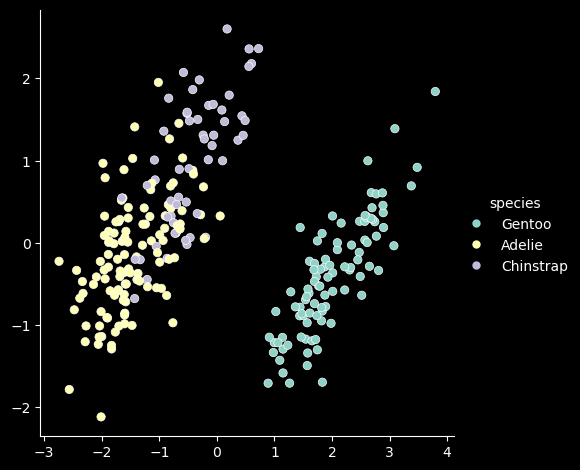

In [27]:
#Plot PCA results
sns.relplot(x=X_train_scaled_pca[:, 0], y=X_train_scaled_pca[:, 1], hue=y_train)

<h2><strong><u>Model Selection and Evaluation</u></strong></h2>

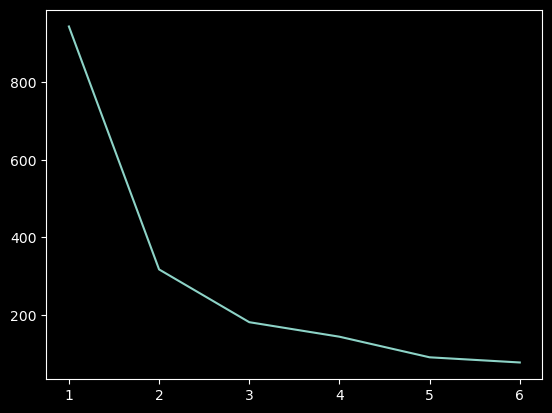

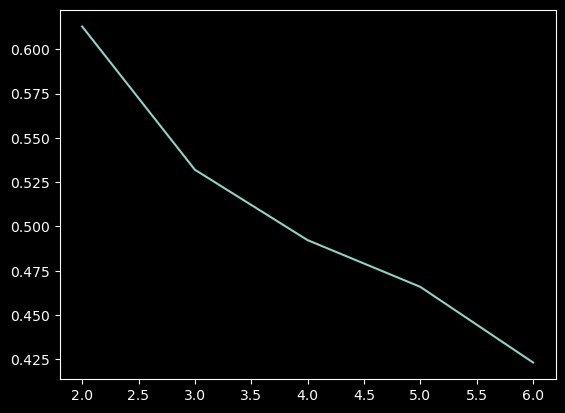

In [31]:
wss_values = []
sil_values = []
for k in range(1, 7):
    clusters = KMeans(n_clusters=k).fit(X_train_scaled_pca)
    wss_values.append(clusters.inertia_)
    if k > 1: sil_values.append(silhouette_score(X_train_scaled_pca, clusters.labels_))
plt.plot(range(1, 7), wss_values)
plt.figure()
plt.plot(range(2, 7), sil_values)

In [35]:
clusters_train = KMeans(n_clusters=3).fit(X_train_scaled_pca)
train_conf_matrix = pair_confusion_matrix(y_train, clusters_train.labels_)
display(train_conf_matrix)

array([[41630,  3660],
       [ 5172, 20028]])

In [36]:
clusters_test = KMeans(n_clusters=3).fit(X_test_scaled_pca)
test_conf_matrix = pair_confusion_matrix(y_test, clusters_test.labels_)
display(test_conf_matrix)

array([[2024,  806],
       [ 260, 1332]])

In [38]:
display("Pairwise training accuracy: ", (train_conf_matrix[0][0]+train_conf_matrix[1][1]) / (train_conf_matrix[0][0]+train_conf_matrix[0][1] + train_conf_matrix[1][0] + train_conf_matrix[1][1]))
display("Pairwise testing accuracy: ", (test_conf_matrix[0][0]+test_conf_matrix[1][1]) / (test_conf_matrix[0][0]+test_conf_matrix[0][1] + test_conf_matrix[1][0] + test_conf_matrix[1][1]))

'Pairwise training accuracy: '

np.float64(0.8747056320045397)

'Pairwise testing accuracy: '

np.float64(0.7589326096788783)